In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [6]:
df = np.genfromtxt('/data9/UN3400/data/brf_temp.txt')

In [7]:
N, i = np.shape(df)

In [8]:
d = df[:,0:1]
d

array([[0.0000000e+00],
       [4.1670000e-02],
       [8.3330000e-02],
       ...,
       [3.6516597e+02],
       [3.6520764e+02],
       [3.6525000e+02]])

In [9]:
dobs = df[:,1:2]
dobs

array([[-17.27],
       [-17.85],
       [-18.42],
       ...,
       [-14.53],
       [-14.68],
       [-14.76]])

In [10]:
M = 3
G = np.zeros((N,M))
G[0:N,0:1] = np.ones((N,1))
G[0:N,1:2] = np.cos((2*np.pi/365.35)*d)
G[0:N,2:3] = np.sin((2*np.pi/365.35)*d)
G[0:N,3:4] = 1
G

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  9.99999743e-01,  7.16628738e-04],
       [ 1.00000000e+00,  9.99998973e-01,  1.43308513e-03],
       ...,
       [ 1.00000000e+00,  9.99994992e-01, -3.16489027e-03],
       [ 1.00000000e+00,  9.99997003e-01, -2.44826431e-03],
       [ 1.00000000e+00,  9.99998521e-01, -1.71977069e-03]])

In [11]:
GTG = np.matmul(G.T,G)
GTd = np.matmul(G.T,dobs)
mest = np.linalg.lstsq(GTG,GTd,rcond = None)[0]
mest

array([[  9.03830903],
       [-11.58853463],
       [ -4.26018606]])

In [12]:
dpre = np.matmul(G,mest)
e = dobs-dpre
sigmad2 = np.matmul(e.T,e)/(N-M)
Cd = sigmad2 * np.linalg.inv(GTG)
sm = np.sqrt(np.diag(Cd).reshape(-1,1))
sm

array([[0.05392726],
       [0.07570545],
       [0.07680794]])

In [13]:
print("estimated standard deviation")
print(np.sqrt(sigmad2))

estimated standard deviation
[[4.99477224]]


In [14]:
print("estimate solution of model parameters")
for k in range(M):
    print("model parameter %d: %.4f +/- %.4f" % (k, mest[k,0], 2.0*sm[k,0]))

estimate solution of model parameters
model parameter 0: 9.0383 +/- 0.1079
model parameter 1: -11.5885 +/- 0.1514
model parameter 2: -4.2602 +/- 0.1536


Text(0.5, 1.0, 'Air temperature at Black Rock Forest over the Course of a Year')

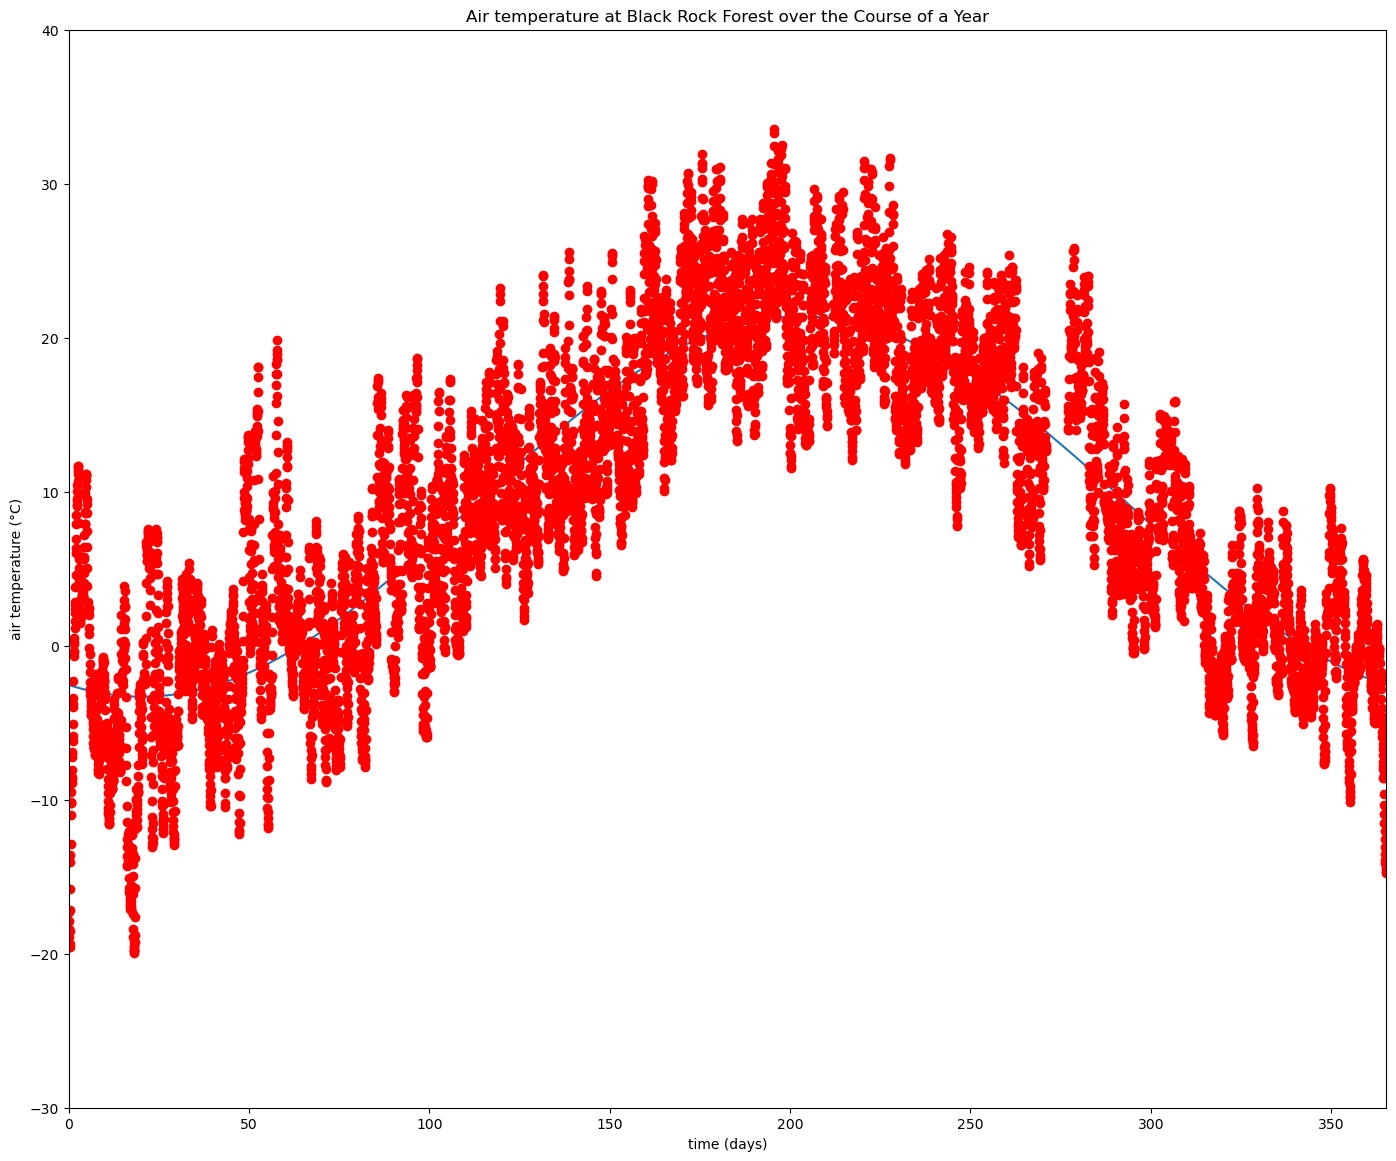

In [15]:
fig, ax = plt.subplots(figsize = (17, 14))
plt.axis([np.min(d), np.max(d), -30,40])
plt.plot(d,dpre)
plt.plot(d,dobs, 'ro')
plt.xlabel('time (days)')
plt.ylabel('air temperature (°C)')
plt.title('Air temperature at Black Rock Forest over the Course of a Year')

In [16]:
from scipy import optimize 

In [17]:
P=365.25
def trigfunc(x, a, b, c):
    y = a* np.cos((2*np.pi/365.35)*x) + b*np.sin((2*np.pi/365.35)*x) + c
    return y

mest_ez = optimize.curve_fit(trigfunc, xdata = df[:,0], ydata = df[:,1])[0]
a = mest_ez[0]
b = mest_ez[1]
c = mest_ez[2]
dpre_trig = a* np.cos((2*np.pi/365.35)*d) + b*np.sin((2*np.pi/365.35)*d) + c

In [18]:
D = np.sqrt(a**2 + b**2)
D

12.346793918784984

In [19]:
t_max = max(d)
t_max

array([365.25])

Text(0.5, 1.0, 'Prediction Error')

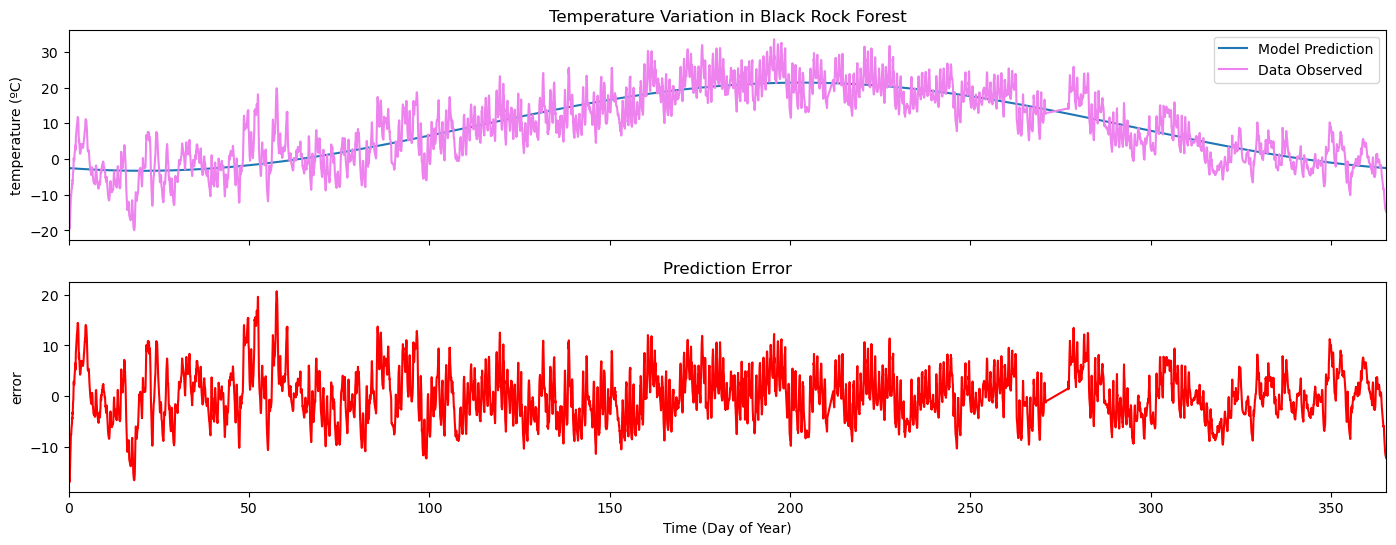

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (17,6), sharex = True)
ax[0].margins(x = 0)
ax[0].plot(d,dpre_trig, label = "Model Prediction")
ax[0].plot(d, dobs, 'violet', label = "Data Observed")
ax[0].set_ylabel('temperature (ºC)')
ax[0].set_title("Temperature Variation in Black Rock Forest")
ax[0].legend()

ax[1].margins(x = 0)
ax[1].plot(d,e, "red")
ax[1].set_xlabel('Time (Day of Year)')
ax[1].set_ylabel('error')
ax[1].set_title('Prediction Error')